In [1]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('wine.csv')
df.shape

(178, 14)

In [3]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [4]:
correlation_matrix = df.corr()
correlation_matrix

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


In [5]:
columns = df.columns

In [6]:
pip install biokit=="0.4.2"

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: soupsieve>1.2; python_version >= "3.0" in c:\users\pedroferreira\anaconda3\lib\site-packages (from beautifulsoup4->bioservices>=1.4.5->biokit==0.4.2) (2.0.1)



In [7]:
pip install matplotlib==3.2.2

Note: you may need to restart the kernel to use updated packages.


C:\Users\PedroFerreira\anaconda3\lib\site-packages\biokit\viz\linkage.py:41: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = hierarchy.linkage(D, method=method, metric=metric)
C:\Users\PedroFerreira\anaconda3\lib\site-packages\biokit\viz\corrplot.py:335: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.
  cb.set_clim(0,1) # make sure it goes from -1 to 1 even though actual values may not reach that range
<ipython-input-8-ba2b4c0857c6>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


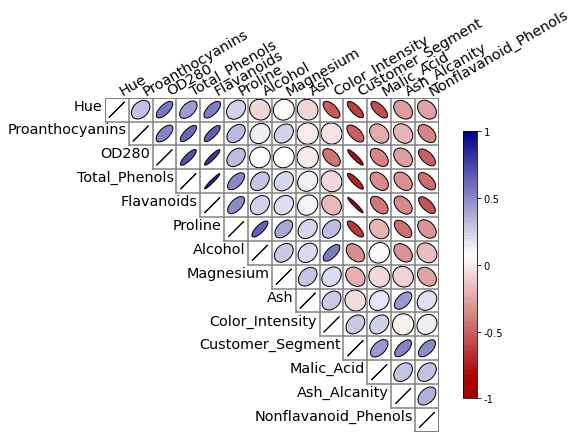

In [8]:
from biokit.viz import corrplot
import matplotlib.pyplot as plt

corr_graph = corrplot.Corrplot(correlation_matrix)
corr_graph.plot(upper= 'ellipse', fontsize='x-large')
fig = plt.gcf()
fig.set_size_inches(13,8)
fig.show()

In [9]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [10]:
# Manual Min max scaler
# attributes = df.columns

# for attribute in attributes:    
#     # min max scaler
#     df[attribute] = (df[attribute] - min(df[attribute]))/(max(df[attribute]) - min(df[attribute]))

# df.head()

In [11]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [12]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
np_df = min_max_scaler.fit_transform(df)
df = pd.DataFrame(np_df, columns = columns)
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446,0.469101
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613,0.387517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702,0.000000
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097,0.500000
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
transformed_df_np = min_max_scaler.inverse_transform(df)
non_normalized_values = pd.DataFrame(transformed_df_np, columns = columns)
non_normalized_values.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [14]:
from sklearn.cluster import KMeans

grouper = KMeans(n_clusters = 4)

grouper.fit(non_normalized_values)

KMeans(n_clusters=4)

In [15]:
labels = grouper.labels_
print(labels)

[1 1 3 3 2 3 3 3 1 1 3 3 3 1 3 3 3 1 3 2 2 2 1 1 2 2 3 3 1 1 3 3 1 3 1 1 1
 1 1 2 2 1 1 2 1 1 1 1 1 3 1 3 3 3 1 1 1 3 3 0 2 0 2 0 0 2 0 0 2 2 1 0 0 1
 1 0 0 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 0 0 1 2 0 2 0 2 0 0 0 2 0 0 0 0 2 0
 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 2 0 0 2 2 2 2 0 2 2 2 2 0 0 1 2 0 2
 2 0 0 0 0 2 2 2 0 1 2 2 0 2 0 2 2 0 2 2 2 2 0 0 2 2 2 2 2 0]


In [16]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = df['Color_Intensity'], y=df['Alcohol'],
                         mode = 'markers',
                         marker = dict(color = grouper.labels_.astype(np.float)),
                         text = labels))
fig.show()                         

In [17]:
grouper = KMeans(n_clusters=3)
grouper.fit(df)
labels = grouper.labels_
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [18]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = df['Color_Intensity'], y=df['Alcohol'],
                         mode = 'markers',
                         marker = dict(color = grouper.labels_.astype(np.float)),
                         text = labels))
fig.show()                         

In [19]:
fig = go.Figure()

fig.add_trace(go.Scatter3d(x = df['Color_Intensity'], 
                         y=df['Alcohol'],
                         z=df['Proline'],
                         mode = 'markers',
                         marker = dict(color = grouper.labels_.astype(np.float)),
                         text = labels))
fig.show()                         

In [20]:
fig.update_layout(scene = dict(
    xaxis_title = 'Color intensity',
    yaxis_title = 'Alcohol',
    zaxis_title = 'Proline'
))

In [21]:
centers = pd.DataFrame(grouper.cluster_centers_)
centers.columns = columns
centers.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,0.558324,0.514721,0.574703,0.558700,0.315439,0.240746,0.096616,0.605314,0.237559,0.517343,0.167413,0.153921,0.249323,0.989796
1,0.711096,0.250000,0.587166,0.342955,0.400906,0.644080,0.557138,0.299371,0.470137,0.359386,0.476558,0.693590,0.595958,0.008333
2,0.322960,0.230939,0.469813,0.487823,0.261342,0.438831,0.366294,0.438337,0.383486,0.151704,0.468081,0.555396,0.167494,0.500000


In [22]:
fig.add_trace(go.Scatter3d(x = centers['Color_Intensity'], 
                         y=centers['Alcohol'],
                         z=centers['Proline'],
                         mode = 'markers',
                         marker = dict(color = 'red'),
                         text = [0,1,2]))
fig.show()

## DBSCAN 

K-means does not work well when our clusters do not have radial symmetry, that is, they are not close to a circle, when we cannot separate it with a circle. Here we can see that these two clusters cannot be separated by a circle or a ball, so K-means ends up misclassifying this.

KMeans' path does not usually show a good result when there are noises and groups of non-radial symmetry.

<img src='imgs/kmeans.png'  style="width: 600px;"/>



KMeans - DBSCAN differnces

<img src='imgs/db_scan-kmeans.png'  style="width: 600px;"/>

DBSCAN groups the groups by the minimum distance between two points (eps) given a specific density (min_samples)

The goal is to make each group have at least a minimum number or minimum density, that “min_samples” of neighboring points, considering as a neighborhood condition a distance less than or equal to “eps”, which is the “epsilon” that we saw there.

<img src='imgs/dbscan.gif'  style="width: 600px;"/>



What are the advantages of DBSCAN? It is robust to outliers, that is, it is robust to noise. It can detect any type of cluster form. The computational cost of it is not so high and it is the second most used clustering algorithm, that is, it is very popular.

What are the disadvantages? It does not work well with high dimensional data. As with KMeans, when we have a lot of attributes, fifteen, twenty, sometimes thirty attributes, it doesn't usually work as well. Why? Because the distance metrics end up losing a little bit of meaning.


In [23]:
# Density Based Spatial Clustering of Applications with Noise
from sklearn.cluster import DBSCAN

# eps: The maximum distance between two samples for one to be considered as in the neighborhood of the other.
grouper = DBSCAN(eps = 1.31, min_samples= 15, metric = 'manhattan')
grouper.fit(df)

DBSCAN(eps=1.31, metric='manhattan', min_samples=15)

In [24]:
# -1 values represents noise
grouper.labels_

array([ 0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0, -1,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,
        1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,
        1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  2, -1,  2, -1,  2,
       -1, -1,  2, -1, -1,  2, -1, -1,  2,  2, -1,  2,  2,  2, -1, -1, -1,
        2, -1,  2,  2, -1, -1, -1,  2,  2,  2,  2,  2, -1,  2,  2,  2, -1,
        2,  2,  2,  2,  2,  2,  2,  2], dtype=int64)

In [25]:
grouper = DBSCAN(eps = 1.31, min_samples = 15, metric = 'manhattan')
grouper.fit(df)
print(grouper.labels_)


[ 0  0  0  0 -1  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0
  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0 -1  0 -1  0 -1  0  0
  0  0 -1  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  1 -1  1  1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1  1 -1  1
 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  2 -1  2 -1  2 -1 -1  2 -1 -1  2 -1 -1
  2  2 -1  2  2  2 -1 -1 -1  2 -1  2  2 -1 -1 -1  2  2  2  2  2 -1  2  2
  2 -1  2  2  2  2  2  2  2  2]


In [26]:
labels = grouper.labels_+1
print(labels)

[1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 2 0 2 2 0 2 2 2 0 0
 0 0 0 0 0 2 2 0 2 0 0 0 0 0 2 0 0 0 0 0 3 0 3 0 3 0 0 3 0 0 3 0 0 3 3 0 3
 3 3 0 0 0 3 0 3 3 0 0 0 3 3 3 3 3 0 3 3 3 0 3 3 3 3 3 3 3 3]


In [27]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df['Color_Intensity'],
                         y=df['Alcohol'], z = df['Proline'],
                         mode='markers',                      
                      marker=dict(color =labels.astype(np.float)),
                        text=labels))
fig.show()

## MeanShift


Mean-Shift is a clustering algorithm that unlike KMeans, it does not require specification of the cluster number and unlike DBSCAN you do not need, for example, to parameterize things like "eps" - in this case it was DBSCAN's "epsilon" - and the minimum number of samples per cluster, but similarly to DBSCAN, it looks for high density regions and claims that in these high density regions there are clusters.

What is the problem that he poses to solve? It is the same problem as DBSCAN, having a set of point “C”, it is desired to group “N” points of this set in groups of maximum density.


This algorithm takes a point, makes a circle around it, sees where it has the highest density of points and moves the center of that cluster over there. As a result, it moves all of our points to high-density regions.

<img src='imgs/meanshift.gif'  style="width: 600px;"/>


- What is the purpose of the algorithm? Group the points according to the high density regions. Why should we use it? That is a very good question! First of all, K-means does not usually present a good result when there is noise and groups of non-radial symmetry, as we saw in previous classes.

It has fewer parameters to adjust than DBSCAN. The DBSCAN has the "eps", the "min_samples" and the metric of the distance calculation. Here in our case of MeanShift, the only parameter that we can objectively manipulate and even in a simple way, is which? It's our bandwidth.

- What are the advantages? It is robust to outliers, that is, it is robust to noise and points outside the curve. It serves for various types of applications, the type of application that is widely used for it is for image segmentation. It is a field that has been well developed. In fact, even for, for example, computer vision. It is widely used.

- - It can detect any type of shape, if you put a smaller bandwidth, you end up detecting stranger shapes and larger bandwidths and we can already detect shapes with more radial symmetry. There is only one parameter to be adjusted, which is the same as what we mentioned, just bandwidth.

- What are the disadvantages? It does not work well with high dimensional data. Why? Because it also uses a distance metric to calculate, just like the other algorithms, and it ends up not working very well when the dimensionality of the data is large, that is, when I have a lot of attributes.

- - Parameterization of bandwidth is not so simple, you have to estimate more or less the density of the points and the values ​​of the location of the points based, for example, on some statistical resources.

- - And it is computationally expensive, because every point at the beginning is treated as a cluster. If it has, for example, a million points - at the beginning I will have a million clusters, It will have to repeat the process for each point until it converges. You can imagine that the computational cost of this algorithm is quite expensive.

In [28]:
from sklearn.cluster import MeanShift

grouper = MeanShift()
grouper.fit(df)

grouper.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [29]:
from sklearn.cluster import estimate_bandwidth

BW = estimate_bandwidth(df, quantile = 0.2)
grouper = MeanShift(BW)
grouper.fit(df)
grouper.labels_

C:\Users\PedroFerreira\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning:

Pass bandwidth=0.7258686846232676 as keyword args. From version 0.25 passing these as positional arguments will result in an error



array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 4, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [30]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df['Color_Intensity'],
                         y=df['Alcohol'], z=df['Proline'],
                         mode = 'markers',                      
                          marker = dict(color = grouper.labels_.astype(np.float)),
                        text = [0, 1, 2]))
fig.show()

In [31]:
fig.update_layout(scene = dict(
                    xaxis_title='Color Intensity',
                    yaxis_title='Alcohol',
                    zaxis_title='Proline'))
fig.show()

In [32]:
centers = pd.DataFrame(grouper.cluster_centers_)
centers.columns = columns

fig.add_trace(go.Scatter3d(x=centers['Color_Intensity'],
                         y=centers['Alcohol'], z=centers['Proline'],
                         mode = 'markers',                  
                         marker = dict(color = 'red'),
                         text = [0, 1, 2]))

In [33]:
grouper = KMeans(n_clusters=5)
grouper.fit(df)
labels = grouper.labels_

In [34]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df['Color_Intensity'],
                         y=df['Alcohol'],
                         z=df['Proline'],
                         mode = 'markers',                  
                         marker = dict(color = labels.astype(np.float)),
                         text = labels))
fig.show()                         

In [35]:
from sklearn.metrics import silhouette_score

range_n_clusters = [i for i in range(2,10)]
print(range_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9]


In [45]:
from sklearn.cluster import KMeans

silhouette_values = []

for k in range_n_clusters:
    grouper = KMeans(n_clusters = k)    
    labels = grouper.fit_predict(df)
    silhouette_mean = silhouette_score(df, labels)
    silhouette_values.append(silhouette_mean)


fig = go.Figure()
fig.add_trace(go.Scatter(x=range_n_clusters,
                         y=silhouette_values))

fig.update_layout(title = 'Silhouette mean values',
                  xaxis_title = 'Number of clusters',
                  yaxis_title = 'Silhouette mean value')                         

In [54]:
quantile_range = np.linspace(0.02, 0.5, 30)
quantile_range

array([0.02      , 0.03655172, 0.05310345, 0.06965517, 0.0862069 ,
       0.10275862, 0.11931034, 0.13586207, 0.15241379, 0.16896552,
       0.18551724, 0.20206897, 0.21862069, 0.23517241, 0.25172414,
       0.26827586, 0.28482759, 0.30137931, 0.31793103, 0.33448276,
       0.35103448, 0.36758621, 0.38413793, 0.40068966, 0.41724138,
       0.4337931 , 0.45034483, 0.46689655, 0.48344828, 0.5       ])

In [55]:
silhouette_values = []
quantile_plot = []

for quantile in quantile_range:
    bandwidth = estimate_bandwidth(df, quantile = quantile)
    grouper = MeanShift(bandwidth)
    labels = grouper.fit_predict(df)

    if(len(np.unique(labels)) < len(df) and len(np.unique(labels)) > 1):
        silhouette_mean = silhouette_score(df, labels)
        silhouette_values.append(silhouette_mean)
        quantile_plot.append(quantile)

C:\Users\PedroFerreira\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning:

Pass bandwidth=0.41407073402433764 as keyword args. From version 0.25 passing these as positional arguments will result in an error

C:\Users\PedroFerreira\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning:

Pass bandwidth=0.49002627383760705 as keyword args. From version 0.25 passing these as positional arguments will result in an error

C:\Users\PedroFerreira\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning:

Pass bandwidth=0.5304660110980739 as keyword args. From version 0.25 passing these as positional arguments will result in an error

C:\Users\PedroFerreira\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning:

Pass bandwidth=0.559893978378914 as keyword args. From version 0.25 passing these as positional arguments will result in an error

C:\Users\PedroFerreira\anaconda3\lib\site-packages\sklearn\utils\validation

In [56]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=quantile_plot,
                         y=silhouette_values))

fig.update_layout(dict(xaxis_title = 'Quantile',
                        yaxis_title = 'Silhouette Mean'))

In [59]:
from sklearn.cluster import KMeans, MeanShift, DBSCAN, estimate_bandwidth
from sklearn.metrics import silhouette_score

grouper_kmeans = KMeans(n_clusters = 3)
grouper_DBSCAN = DBSCAN(eps = 2.1, min_samples = 56, metric = 'manhattan')

BW = estimate_bandwidth(df, quantile = 0.28)
grouper_meanshift = MeanShift(bandwidth=BW)

labels_kmeans = grouper_kmeans.fit_predict(df)
labels_dbscan = grouper_DBSCAN.fit_predict(df)
labels_meanshift = grouper_meanshift.fit_predict(df)

print('Labels KMeans: ', labels_kmeans)
print('Labels DBSCAN: ', labels_dbscan)
print('Labels Meanshift: ', labels_meanshift)

Labels KMeans:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Labels DBSCAN:  [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1  0  0 -1  0  0  0 -1 -1 -1  0
  0 -1  0  0  0 -1 -1  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1  0  0 -1
 -1  0  0 -1  0  0  0  0  0 -1  0  0  0  0 -1  0 -1  0  0 -1  0  0 -1  0
  0 -1 -1  0 -1  0  0 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
Labels Meanshift:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [61]:
print('Silhouette coefficient of KMeans is: ', silhouette_score(df, labels_kmeans))
print('Silhouette coefficient of DBSCAN is: ', silhouette_score(df, labels_dbscan))
print('Silhouette coefficient of Meanshift is: ', silhouette_score(df, labels_meanshift))

Silhouette coefficient of KMeans is:  0.36950618492736303
Silhouette coefficient of DBSCAN is:  0.3016232115094375
Silhouette coefficient of Meanshift is:  0.30591528661156275


The above code shows that according to the silhouette coefficient, KMeans is the best grouper for the given dataframe